#### Function to find the cause of the fires by unit in each year

In [35]:
# read the excel sheet pages and covnert them to the dataframe in pandas
# this excel sheet pages are from 2009 to 2016

def getDfList():
    '''
    This function will collect cause of fire between 2009 to 2016, remove NAN values,
    and return it as list
    '''
    
    import pandas as pd
    df_16 = [pd.read_excel("2016_Redbook_FINAL.xlsx",sheet_name='Table 12',skiprows=1)]
    df_15 = [pd.read_excel("2015_Redbook_FINAL.xlsx",sheet_name='Table 12',skiprows=1),
             pd.read_excel("2015_Redbook_FINAL.xlsx",sheet_name='Table 13',skiprows=1)]
    df_14 = [pd.read_excel("2014_Redbook_Complete.xlsx",sheet_name='Table 12',skiprows=1),
             pd.read_excel("2014_Redbook_Complete.xlsx",sheet_name='Table 13',skiprows=1)]
    df_13 = [pd.read_excel("2013_Redbook_Final.xlsx",sheet_name='Table 13',skiprows=1),
             pd.read_excel("2013_Redbook_Final.xlsx",sheet_name='Table 14',skiprows=1)]
    df_12 = [pd.read_excel("2012_Redbook_Complete.xlsx",sheet_name='Table 14',skiprows=1),
             pd.read_excel("2012_Redbook_Complete.xlsx",sheet_name='Table 15',skiprows=1)]
    df_11 = [pd.read_excel("2011_Redbook_Final.xlsx",sheet_name='Table 13',skiprows=1),
             pd.read_excel("2011_Redbook_Final.xlsx",sheet_name='Table 14',skiprows=1)]
    df_10 = [pd.read_excel("2010_Redbook_Final_Complete.xlsx",sheet_name='Table 9',skiprows=1),
             pd.read_excel("2010_Redbook_Final_Complete.xlsx",sheet_name='Table 10',skiprows=1)]
    df_09 = [pd.read_excel("2009_Redbook_Complete_Final.xlsx",sheet_name='Table 13',skiprows=2),
             pd.read_excel("2009_Redbook_Complete_Final.xlsx",sheet_name='Table 14',skiprows=2)]
    
    df_list = [df_09, df_10, df_11, df_12, df_13, df_14, df_15, df_16]
    for i in range(len(df_list)):
        for j in range(len(df_list[i])):
            df_list[i][j] = df_list[i][j].dropna(axis=1, thresh=3)
            df_list[i][j] = df_list[i][j].dropna(axis=0, thresh=3)
            df_list[i][j] = df_list[i][j].reset_index(drop=True)
        
    return df_list

#### Function to correct format

In [37]:
def correctName( df_list ):
    '''
    This function will correct the name of the columns to the form o causes
    This function will also correct remove all '\n' in indexes and columns
    '''
    
    import pandas as pd
    import numpy as np

    for i in range(len(df_list) - 1):
        for j in range(2):
            df_list[i][j] = df_list[i][j].replace('\n',' ', regex=True)
            df_list[i][j] = df_list[i][j].replace('  ',' ', regex=True)
            df_list[i][j] = df_list[i][j].rename(columns={'Powerline': 'Elec. Power'})
            df_list[i][j] = df_list[i][j].rename(columns={'Power Line': 'Elec. Power'})
            df_list[i][j] = df_list[i][j].rename(columns={'Power\nLine': 'Elec. Power'})
            df_list[i][j] = df_list[i][j].rename(columns={'Rail-\nroad': 'Railroad'})
            df_list[i][j] = df_list[i][j].rename(columns={'Rail- road': 'Railroad'})
            df_list[i][j] = df_list[i][j].rename(columns={'Rail\nroad': 'Railroad'})
            df_list[i][j] = df_list[i][j].rename(columns={'Debris\nBurning': 'Debris Burning'})
            df_list[i][j] = df_list[i][j].rename(columns={'Equip.\nUse': 'Equip. Use'})

    return df_list

#### Function to get total fires of south and north

In [3]:
# this part will create a dataframe which contains the cause of fire between 2009 to 2016
# the data frame will be used to print chart

def getSouthNorthDateFrame( df_list ):
    '''
    This function will use the given dataframe list to generate the total fires of each year 
    of northern region and southern region.
    '''
    
    import pandas as pd
    import numpy as np

    # format of causes 
    causes = ['Arson', 'Campfire', 'Debris Burning','Equip. Use', 'Ltng.',
              'Misc.', 'P-W-F', 'Elec. Power', 'Railroad', 'Smoking', 'Undet.', 'Vehicle']
    cause_code = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

    # create north and south dataframe
    north = pd.DataFrame(columns=causes)
    south = pd.DataFrame(columns=causes)

    # correct the column name
    df_list = correctName( df_list )

    # find each cause of fire between 2009 to 2015
    for i in range(len(df_list) - 1):
        for j in range(df_list[i][0].shape[0]):
            # append northern region total into 'north'
            if df_list[i][0].loc[j][0] == 'NORTHERN REGION TOTAL' :

                ef = pd.DataFrame( index=['%d' % (i + 2009)], columns=causes, 
                                   data=np.array(df_list[i][0].loc[j][2:].reindex(causes).tolist()).reshape(1, 12) )
                north = north.append(ef)
                break

        for j in range(df_list[i][1].shape[0]):
            # append southern region total into 'south'
            if df_list[i][1].loc[j][0] == 'SOUTHERN REGION TOTAL' :

                ef = pd.DataFrame( index=['%d' % (i + 2009)], columns=causes,
                                   data=np.array(df_list[i][1].loc[j][2:].reindex(causes).tolist()).reshape(1, 12) )
                south = south.append(ef)
                break


    # find the each cause of fire in 2016
    count = 0 # used to check times to meet 'TOTAL'

    for i in range(df_list[-1][0].shape[0]):

        if df_list[-1][0].loc[i][0] == 'TOTAL':
            if count == 0: # used to find the north area
                ef = pd.DataFrame( index=['2016'], columns=causes, 
                                  data=np.array(df_list[-1][0].loc[i][2:].tolist()).reshape(1, 12) )
                north = north.append(ef)
                count += 1

            else: # used to find the south area
                ef = pd.DataFrame( index=['2016'], columns=causes, 
                                  data=np.array(df_list[-1][0].loc[i][2:].tolist()).reshape(1, 12) )
                south = south.append(ef)
                count += 1
    
    return [north, south]

#### This part will calculate the average numbers of each cause during 2009 to 2016

In [43]:
def getAvgCauses( north, south ):
    '''
    This function will calculate the average number of each cause during 2009 to 2016.
    '''
    
    causes = ['Arson', 'Campfire', 'Debris Burning','Equip. Use', 'Ltng.',
              'Misc.', 'P-W-F', 'Elec. Power', 'Railroad', 'Smoking', 'Undet.', 'Vehicle']
    northAvg = []
    southAvg = []
    
    for cause in causes:
        northAvg.append(north[cause].sum()/north.shape[0])
        southAvg.append(south[cause].sum()/south.shape[0])
    
    return [northAvg, southAvg] 

#### This part will plot the avgerage numbers of each cause during 2009 to 2016

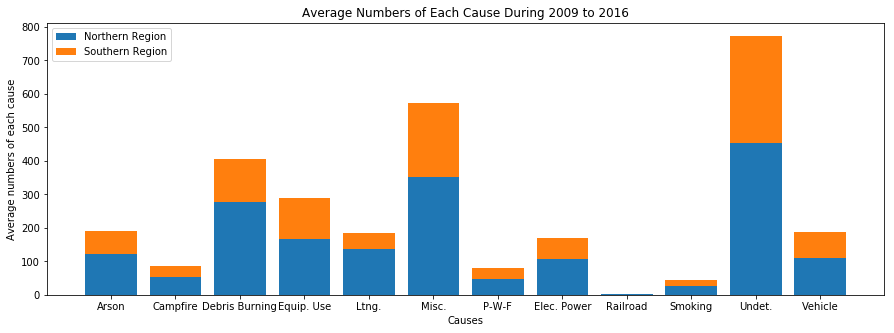

In [44]:
# get the average number of each cause
df_list = correctName( getDfList() )
[north, south] = getSouthNorthDateFrame( df_list )
[northAvg, southAvg] = getAvgCauses( north, south )

import matplotlib.pyplot as plt

causes = ['Arson', 'Campfire', 'Debris Burning','Equip. Use', 'Ltng.',
          'Misc.', 'P-W-F', 'Elec. Power', 'Railroad', 'Smoking', 'Undet.', 'Vehicle']
cause_code = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

fig1 = plt.figure(figsize=(15,5))
pNorth = plt.bar(cause_code, northAvg, align='center')
pSouth = plt.bar(cause_code, southAvg, bottom=northAvg, align='center')
plt.xticks(cause_code, causes);
plt.title("Average Numbers of Each Cause During 2009 to 2016")
plt.xlabel("Causes")
plt.ylabel("Average numbers of each cause")
plt.legend((pNorth[0], pSouth[0]), ('Northern Region', 'Southern Region'))
plt.show()

#### This part will plot the tendency fire during 2009 to 2016

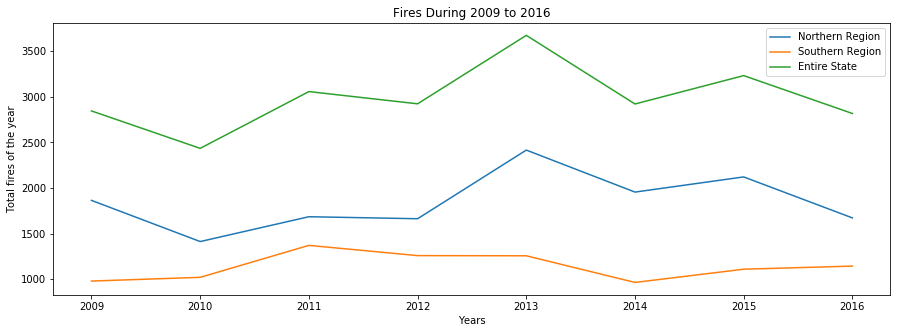

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots

fig2,ax = subplots(figsize=(15,5))
years = range(2009, 2017)

p1 = ax.plot(years, north.T.sum());
p2 = ax.plot(years, south.T.sum());
p3 = ax.plot(years, south.T.sum() + north.T.sum());
plt.title("Fires During 2009 to 2016")
plt.xlabel("Years")
plt.ylabel("Total fires of the year")
plt.legend((p1[0], p2[0], p3[0]), ('Northern Region', 'Southern Region', 'Entire State'))
plt.show()

#### Top Three Causes of each year